In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
df_m = pd.read_csv("C:/Users/MJHwang/Desktop/tobigs/Tobigs20/Week9/ml-latest-small/movies.csv"); df_m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [155]:
df_l = pd.read_csv("C:/Users/MJHwang/Desktop/tobigs/Tobigs20/Week9/ml-latest-small/links.csv"); df_l

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [156]:
df_r = pd.read_csv("C:/Users/MJHwang/Desktop/tobigs/Tobigs20/Week9/ml-latest-small/ratings.csv"); df_r

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [157]:
df_t = pd.read_csv("C:/Users/MJHwang/Desktop/tobigs/Tobigs20/Week9/ml-latest-small/tags.csv"); df_t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [158]:
ml = df_l.merge(df_m, on = 'movieId'); ml 
# movie와 links를 movieId를 기준으로 하나의 데이터프레임으로 merge

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [159]:
print(ml.isna().sum())
print(df_r.isna().sum())
print(df_t.isna().sum())

# tmdbId 열에 결측값 존재

movieId    0
imdbId     0
tmdbId     8
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [160]:
ml[pd.isna(ml["tmdbId"])]

,movieId,imdbId,tmdbId,title,genres
624,791,113610,NaN,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary
843,1107,102336,NaN,Loser (1991),Comedy
2141,2851,81454,NaN,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
3027,4051,56600,NaN,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi
5532,26587,92337,NaN,"Decalogue, The (Dekalog) (1989)",Crime|Drama|Romance
5854,32600,377059,NaN,Eros (2004),Drama
6059,40697,105946,NaN,Babylon 5,Sci-Fi
7382,79299,874957,NaN,"No. 1 Ladies' Detective Agency, The (2008)",Comedy|Crime|Mystery


In [161]:
print(ml.info())
print(df_r.info())
print(df_t.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9742 non-null   object 
 4   genres   9742 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 456.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---

In [162]:
ml = ml.dropna(subset = ['tmdbId']); ml # 결측치 제거

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [163]:
ml['year'] = ml['title'].str.extract(r'\((\d{4})\)');ml # 년도 year열로 뽑아냄

C:\Users\MJHwang\AppData\Local\Temp\ipykernel_11792\1660316397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['year'] = ml['title'].str.extract(r'\((\d{4})\)');ml # 년도 year열로 뽑아냄


,movieId,imdbId,tmdbId,title,genres,year
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,6397426,479308.0,Flint (2017),Drama,2017
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [164]:
ml['year'] = ml['year'].astype(float)

C:\Users\MJHwang\AppData\Local\Temp\ipykernel_11792\1260062270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['year'] = ml['year'].astype(float)


In [165]:
ml['genres'] = ml['genres'].apply(lambda x: x.split('|')) # genres열 split해 정리

C:\Users\MJHwang\AppData\Local\Temp\ipykernel_11792\1131989451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml['genres'] = ml['genres'].apply(lambda x: x.split('|')) # genres열 split해 정리


In [166]:
ml

,movieId,imdbId,tmdbId,title,genres,year
0,1,114709,862.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,113497,8844.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,113228,15602.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,114885,31357.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,113041,11862.0,Father of the Bride Part II (1995),[Comedy],1995.0
...,...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017.0
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017.0
9739,193585,6397426,479308.0,Flint (2017),[Drama],2017.0
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018.0


In [167]:
sort_year = ml['year'].value_counts().sort_index(); rating_year

1902.0      1
1903.0      1
1908.0      1
1915.0      1
1916.0      4
         ... 
2014.0    278
2015.0    274
2016.0    218
2017.0    147
2018.0     41
Name: year, Length: 106, dtype: int64

<AxesSubplot:>

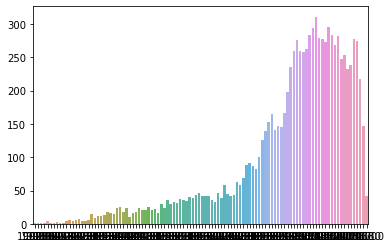

In [168]:
sns.barplot(x=sort_year.index, y=sort_year.values, alpha = 0.9)
# 시간이 지날수록 영화 수 증가

In [169]:
ml.info() # year에 결측치 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9741
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9734 non-null   object 
 4   genres   9734 non-null   object 
 5   year     9722 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 532.3+ KB


In [170]:
rating_sort = df_r['rating'].value_counts().sort_index(); rating_sort

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

In [171]:
df_r['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

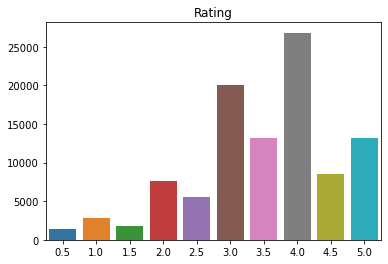

In [172]:
sns.barplot(x=rating_sort.index, y=rating_sort.values)
plt.title("Rating")
plt.show()

In [173]:
from collections import Counter
genres = Counter()
for i in ml['genres']:
    genres.update(i)

In [174]:
genres

Counter({'Adventure': 1262,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3754,
         'Fantasy': 779,
         'Romance': 1595,
         'Drama': 4359,
         'Action': 1828,
         'Crime': 1197,
         'Thriller': 1893,
         'Horror': 977,
         'Mystery': 572,
         'Sci-Fi': 977,
         'War': 382,
         'Musical': 334,
         'Documentary': 439,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no genres listed)': 34})

In [175]:
dict(sorted(genres.items(), key=lambda x: x[1], reverse=True)) #드라마 장르가 가장 많음

{'Drama': 4359,
 'Comedy': 3754,
 'Thriller': 1893,
 'Action': 1828,
 'Romance': 1595,
 'Adventure': 1262,
 'Crime': 1197,
 'Horror': 977,
 'Sci-Fi': 977,
 'Fantasy': 779,
 'Children': 664,
 'Animation': 611,
 'Mystery': 572,
 'Documentary': 439,
 'War': 382,
 'Musical': 334,
 'Western': 167,
 'IMAX': 158,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [176]:
rating_lower = df_r[df_r['rating'] == 0.5] ;rating_lower

,userId,movieId,rating,timestamp
261,3,31,0.5,1306463578
262,3,527,0.5,1306464275
263,3,647,0.5,1306463619
264,3,688,0.5,1306464228
265,3,720,0.5,1306463595
...,...,...,...,...
99394,608,6827,0.5,1117519648
99408,608,7004,0.5,1117506252
100345,610,61818,0.5,1493848943
100415,610,72424,0.5,1493849030


In [177]:
rating_lower['userId'].value_counts()
# userId가 298인 사람이 평점 0.5의 약 10%를 차지하고 있음

298    144
567     56
307     56
517     54
489     48
      ... 
421      1
146      1
147      1
414      1
431      1
Name: userId, Length: 179, dtype: int64

In [178]:
df_r.query('userId==298')

,userId,movieId,rating,timestamp
44535,298,1,2.0,1447518257
44536,298,2,0.5,1450452897
44537,298,16,4.0,1447597782
44538,298,32,4.0,1450369288
44539,298,47,4.0,1447518037
...,...,...,...,...
45469,298,149352,0.5,1466277933
45470,298,149354,0.5,1466277836
45471,298,156371,3.5,1466277191
45472,298,156609,0.5,1479058487


In [179]:
rating_upper = df_r[df_r['rating'] == 5.0] ;rating_upper

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100
...,...,...,...,...
100814,610,158238,5.0,1479545219
100829,610,164179,5.0,1493845631
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [180]:
rating_upper['userId'].value_counts()

380    274
414    248
275    189
305    182
610    180
      ... 
449      1
237      1
440      1
350      1
158      1
Name: userId, Length: 573, dtype: int64

In [181]:
df_r['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [182]:
df_r.groupby('userId')['rating'].mean().sort_values(ascending = False)
# userId가 53인 유저가 준 평점 평균이 가장 높음

userId
53     5.000000
251    4.869565
515    4.846154
25     4.807692
30     4.735294
         ...   
567    2.245455
153    2.217877
508    2.145833
139    2.144330
442    1.275000
Name: rating, Length: 610, dtype: float64

In [183]:
df_t["tag"].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: tag, Length: 1589, dtype: int64

In [188]:
from surprise import Dataset
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset

In [189]:
reader = Reader(line_format = 'user item rating', sep=',', rating_scale=(0.5, 5))
df = Dataset.load_from_df(df_r[['userId', 'movieId', 'rating']], reader=reader)
train, test = train_test_split(df, test_size=0.25, random_state=2020)

In [199]:
knn = KNNBasic()
knn.fit(train)
knn_pred = knn.test(test)
for prediction in knn_pred[:5]:
    print(f"User: {prediction.uid}, Movie: {prediction.iid}, Rating: {prediction.est}")
print(f'RMSE: {accuracy.rmse(knn_pred)}')

Computing the msd similarity matrix...
Done computing similarity matrix.
User: 105, Movie: 116797, Rating: 4.091929348839632
User: 608, Movie: 4643, Rating: 2.753836664301325
User: 590, Movie: 903, Rating: 4.133529844747125
User: 202, Movie: 2194, Rating: 4.007200978876703
User: 122, Movie: 63131, Rating: 3.609826743287848
RMSE: 0.9479
RMSE: 0.9478699638139498


In [198]:
svd = SVD()
svd.fit(train)
svd_pred = svd.test(test)
for prediction in svd_pred[:5]:
    print(f"User: {prediction.uid}, Movie: {prediction.iid}, Actual Rating: {prediction.r_ui}, Predicted Rating: {prediction.est}")
print(f'RMSE: {accuracy.rmse(svd_pred)}')

User: 105, Movie: 116797, Actual Rating: 4.0, Predicted Rating: 4.454134973929717
User: 608, Movie: 4643, Actual Rating: 3.0, Predicted Rating: 2.4445410639150524
User: 590, Movie: 903, Actual Rating: 4.5, Predicted Rating: 3.9370206165391983
User: 202, Movie: 2194, Actual Rating: 4.0, Predicted Rating: 3.853255186345532
User: 122, Movie: 63131, Actual Rating: 4.0, Predicted Rating: 4.347134622996737
RMSE: 0.8753
RMSE: 0.8753369173757942
